In [1]:
import pandas as pd
reviews = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv')
movies = pd.read_csv('./data/rotten_tomatoes_movies.csv')
movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [2]:
df = reviews[['rotten_tomatoes_link','review_content','review_type']]
df =df.dropna(axis=0)
df.head()

,rotten_tomatoes_link,review_content,review_type
0,m/0814255,A fantasy adventure that fuses Greek mythology...,Fresh
1,m/0814255,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh
2,m/0814255,With a top-notch cast and dazzling special eff...,Fresh
3,m/0814255,Whether audiences will get behind The Lightnin...,Fresh
4,m/0814255,What's really lacking in The Lightning Thief i...,Rotten


In [3]:
df['review_type'].value_counts() / len(df)

Fresh     0.639944
Rotten    0.360056
Name: review_type, dtype: float64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['review_type']) 

In [5]:
y[:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocab_size = 3000
vect = TfidfVectorizer(decode_error='ignore',stop_words='english',max_features=vocab_size)
X = vect.fit_transform(df['review_content'])

In [7]:
Xd = X.todense()

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def split_fit_eval(X, y, model=None,epochs=10,random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    if not model:
        model = Sequential()
        model.add(Dense(1, input_dim=X.shape[1],activation='sigmoid'))
        model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        h = model.fit(X_train, y_train,epochs=epochs,verbose=0)
        loss, acc = model.evaluate(X_test, y_test)
        return loss, acc, model, h

In [9]:
res = split_fit_eval(Xd, y)

8315/8315 [==============================] - 6s 711us/step - loss: 0.4725 - accuracy: 0.7706


In [10]:
print("Test set accuracy:\t{:0.3f}".format(res[1]))

Test set accuracy:	0.771


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['review_content'])

In [12]:
list(tokenizer.word_index)[:10]

['the', 'a', 'and', 'of', 'to', 'is', 'in', 'it', 'that', 'as']

In [13]:
sequences = tokenizer.texts_to_sequences(df['review_content'])

In [14]:
sequences[:3]

[[2,
  413,
  326,
  9,
  2751,
  5,
  906,
  214,
  1233,
  3,
  1360,
  361,
  249,
  2365,
  315,
  41,
  177,
  2,
  652,
  4,
  226,
  52,
  1171,
  5,
  1,
  307,
  791],
 [2677, 10, 1, 12, 2, 4, 3, 1262, 2229, 6, 24, 4, 1, 4, 14, 413],
 [12,
  2,
  348,
  2076,
  136,
  3,
  1368,
  325,
  291,
  14,
  52,
  1,
  1942,
  108,
  575,
  1,
  433,
  1763,
  2043]]

In [15]:
tok_items = tokenizer.word_index.items()
idx_to_word = {i:w for w, i in tok_items}

In [16]:
df.loc[0, 'review_content']

'A fantasy adventure that fuses Greek mythology to contemporary American places and values. Anyone around 15 (give or take a couple of years) will thrill to the visual spectacle'

In [17]:
maxlen = max([len(seq) for seq in sequences])
maxlen

53

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
X = pad_sequences(sequences, maxlen=maxlen)

In [20]:
X.shape

(1064211, 53)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=16,input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=128,epochs=4, validation_split=0.2)

Epoch 1/4
4989/4989 [==============================] - 1907s 382ms/step - loss: 0.4836 - accuracy: 0.7600 - val_loss: 0.4106 - val_accuracy: 0.8046
Epoch 2/4
4989/4989 [==============================] - 5450s 1s/step - loss: 0.4017 - accuracy: 0.8104 - val_loss: 0.3941 - val_accuracy: 0.8151
Epoch 3/4
4989/4989 [==============================] - 91s 18ms/step - loss: 0.3836 - accuracy: 0.8210 - val_loss: 0.3885 - val_accuracy: 0.8177
Epoch 4/4
4989/4989 [==============================] - 84s 17ms/step - loss: 0.3736 - accuracy: 0.8267 - val_loss: 0.3823 - val_accuracy: 0.8213


In [23]:
loss, acc = model.evaluate(X_test, y_test, batch_size=32)
acc

8315/8315 [==============================] - 20s 2ms/step - loss: 0.3850 - accuracy: 0.8211


0.8210920095443726

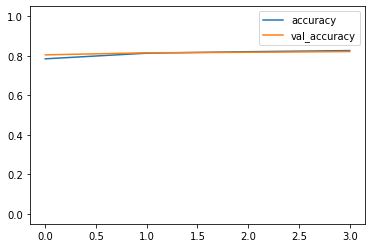

In [24]:
dfhistory = pd.DataFrame(h.history)
dfhistory[['accuracy', 'val_accuracy']].plot(ylim=(-0.05, 1.05));

<AxesSubplot:>

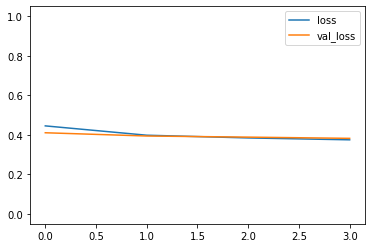

In [25]:
dfhistory[['loss', 'val_loss']].plot(ylim=(-0.05, 1.05))